# Постановка задачи

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import  make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import make_scorer
from sklearn.svm import LinearSVR
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    train = pd.read_csv(r'C:\Users\kuzmi\Downloads\gold_recovery_train_new.csv', index_col='date')
    test = pd.read_csv(r'C:\Users\kuzmi\Downloads\gold_recovery_test_new.csv', index_col='date')
    full = pd.read_csv(r'C:\Users\kuzmi\Downloads\gold_recovery_full_new.csv', index_col='date')
except:
    train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
    test = pd.read_csv(r'/datasets/gold_recovery_test_new.csv', index_col='date')
    full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')

In [3]:
train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [5]:
test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [7]:
full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

## Проверим, правильно ли рассчитана эффективность обогащения

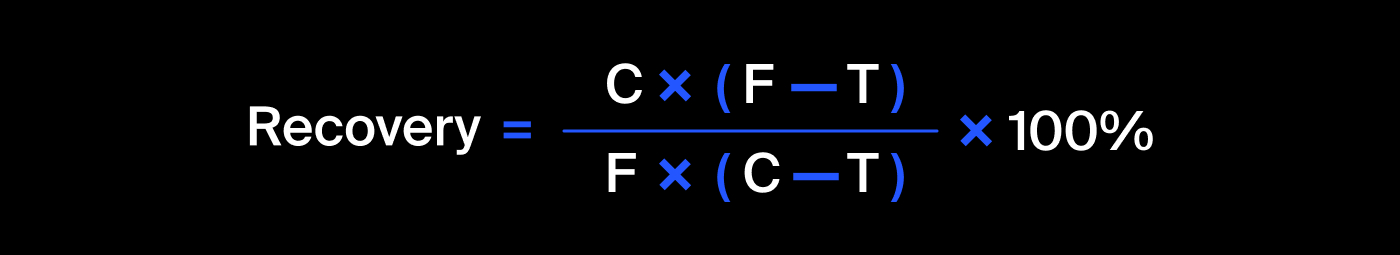

C — доля золота в концентрате после флотации/очистки;

F — доля золота в сырье/концентрате до флотации/очистки;

T — доля золота в отвальных хвостах после флотации/очистки.

In [9]:
C = train['rougher.output.concentrate_au'].dropna()
F = train['rougher.input.feed_au'].dropna()
T = train['rougher.output.tail_au'].dropna()

In [10]:
recovery = (C * (F - T)) / (F * (C - T)) * 100
recovery

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Length: 14149, dtype: float64

In [11]:
mae_recovery = (train['rougher.output.recovery'] - recovery).sum()/train.shape[0]
mae_recovery

1.3885438295121047e-16

Значение MAE очень невелико - эффективность обогащения рассчитана правильно

## Признаки, недоступные в тестовой выборке

In [12]:
not_in_test = set(train.columns) - set(test.columns)
not_in_test

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже(технологический процесс). Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей.  Также в тестовом наборе нет целевых признаков(rougher/final.output.recovery). 

## Предобработка данных

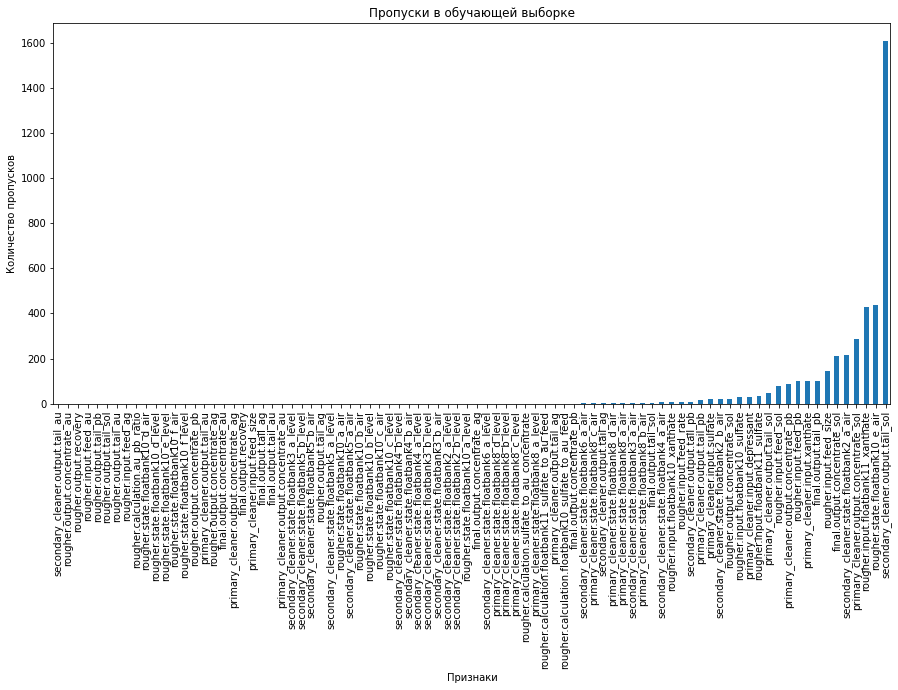

In [13]:
train.isna().sum().sort_values().plot(kind = 'bar', figsize=(15,7))
plt.xlabel('Признаки')
plt.ylabel('Количество пропусков')
plt.title('Пропуски в обучающей выборке')
plt.show()

In [14]:
train.isna().sum().sort_values().tail(20)

primary_cleaner.output.tail_pb                15
primary_cleaner.input.sulfate                 20
secondary_cleaner.state.floatbank2_b_air      21
rougher.output.concentrate_sol                22
rougher.input.floatbank10_sulfate             29
primary_cleaner.input.depressant              32
rougher.input.floatbank11_sulfate             36
primary_cleaner.output.tail_sol               46
rougher.input.feed_sol                        78
primary_cleaner.output.concentrate_pb         86
rougher.input.feed_pb                        100
primary_cleaner.input.xanthate               100
final.output.tail_pb                         100
rougher.input.feed_size                      144
final.output.concentrate_sol                 211
secondary_cleaner.state.floatbank2_a_air     217
primary_cleaner.output.concentrate_sol       286
rougher.input.floatbank11_xanthate           428
rougher.state.floatbank10_e_air              436
secondary_cleaner.output.tail_sol           1605
dtype: int64

Данные индексируются по значению date (дата и время), поэтому можно заполнить пропуски методом ffill

In [15]:
full=full.fillna(method='ffill')
train=train.fillna(method='ffill')
test=test.fillna(method='ffill')

In [16]:
train.isna().sum().sum()

0

### Промежуточный вывод

Данные подготовлены к анализу:
- проверили правильность рассчета эффективности обогащения(расчет верен),
- обнаружили признаки, отсуствующие в тестовой выборке,
- заполнили пропуски методом forward fill

# Анализ данных

## Концентрация металлов на различных этапах очистки

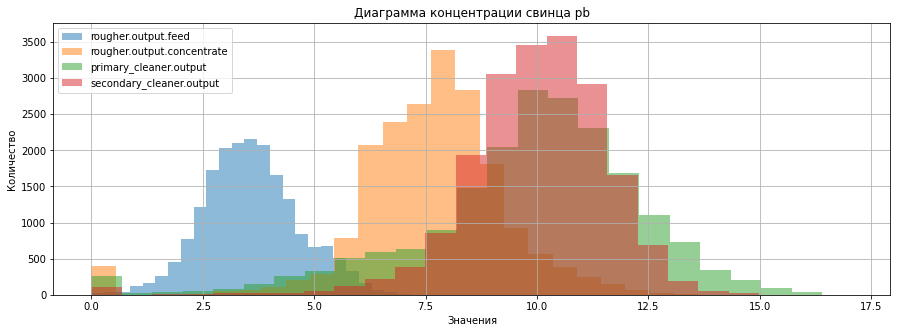

In [17]:
plt.figure(figsize=(15,5))

full['rougher.input.feed_pb'].hist(bins=25, label='rougher.output.feed', alpha=0.5)
full['rougher.output.concentrate_pb'].hist(bins=25, label='rougher.output.concentrate', alpha=0.5)
full['primary_cleaner.output.concentrate_pb'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
full['final.output.concentrate_pb'].hist(bins=25, label='secondary_cleaner.output', alpha=0.5)
plt.title('Диаграмма концентрации свинца pb')

plt.legend(loc='upper left')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.show()


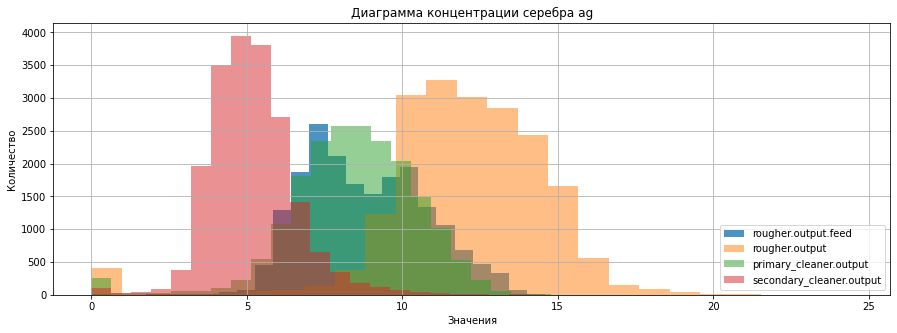

In [18]:
plt.figure(figsize=(15,5))
full['rougher.input.feed_ag'].hist(bins=25, label='rougher.output.feed', alpha=0.8)
full['rougher.output.concentrate_ag'].hist(bins=25, label='rougher.output', alpha=0.5)
full['primary_cleaner.output.concentrate_ag'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
full['final.output.concentrate_ag'].hist(bins=25, label='secondary_cleaner.output', alpha=0.5)
plt.title('Диаграмма концентрации серебра ag')
plt.legend(loc='lower right')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.show()

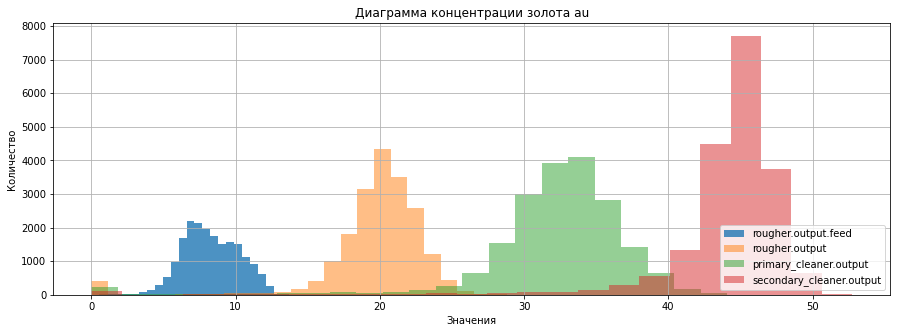

In [19]:
plt.figure(figsize=(15,5))
full['rougher.input.feed_au'].hist(bins=25, label='rougher.output.feed', alpha=0.8)
full['rougher.output.concentrate_au'].hist(bins=25, label='rougher.output', alpha=0.5)
full['primary_cleaner.output.concentrate_au'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
full['final.output.concentrate_au'].hist(bins=25, label='secondary_cleaner.output', alpha=0.5)
plt.title('Диаграмма концентрации золота au')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.legend(loc='lower right')
plt.show()

In [20]:
print('До флотации:')
print("Ag:", train['rougher.input.feed_ag'].mean())
print('Pb:', train['rougher.input.feed_pb'].mean())
print('Au:', train['rougher.input.feed_au'].mean())

До флотации:
Ag: 8.579195196596277
Pb: 3.5054646776095564
Au: 7.866576841919407


In [21]:
print('После флотации:')
print("Ag:", train['rougher.output.concentrate_ag'].mean())
print('Pb:', train['rougher.output.concentrate_pb'].mean())
print('Au:', train['rougher.output.concentrate_au'].mean())

После флотации:
Ag: 11.775812314356036
Pb: 7.664554751481546
Au: 19.43995785143646


In [22]:
print('После первичной очистки:')
print("Ag:", train['primary_cleaner.output.concentrate_ag'].mean())
print('Pb:', train['primary_cleaner.output.concentrate_pb'].mean())
print('Au:', train['primary_cleaner.output.concentrate_au'].mean())

После первичной очистки:
Ag: 8.200915815165981
Pb: 9.568544006770484
Au: 32.386835978391346


In [23]:
print('После вторичной очистки:')
print("Ag:", train['final.output.concentrate_ag'].mean())
print('Pb:', train['final.output.concentrate_pb'].mean())
print('Au:', train['final.output.concentrate_au'].mean())

После вторичной очистки:
Ag: 5.141920924857091
Pb: 10.132847758146394
Au: 44.00379162105571


С каждым новым этапом очистки концентрация золота и свинца возрастает, тогда как концентрация серебра понижается

## Сравнение распределения размеров гранул

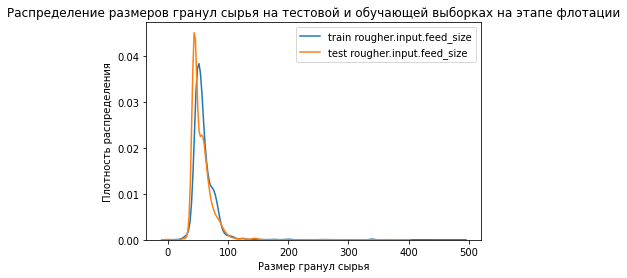

In [24]:
sns.kdeplot(train['rougher.input.feed_size'], label='train rougher.input.feed_size')
sns.kdeplot(test['rougher.input.feed_size'], label='test rougher.input.feed_size')
plt.xlabel('Размер гранул сырья')
plt.ylabel('Плотность распределения')
plt.title('Распределение размеров гранул сырья на тестовой и обучающей выборках на этапе флотации')

plt.legend();

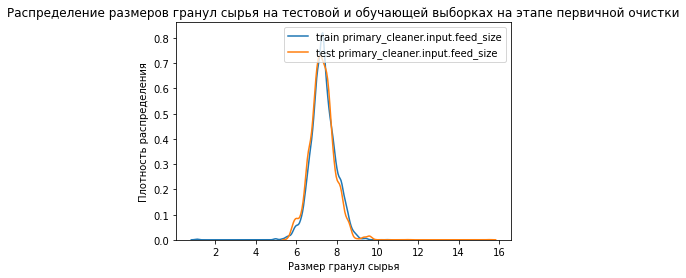

In [25]:
sns.kdeplot(train['primary_cleaner.input.feed_size'], 
         label='train primary_cleaner.input.feed_size')
sns.kdeplot(test['primary_cleaner.input.feed_size'],  
         label='test primary_cleaner.input.feed_size')
plt.xlabel('Размер гранул сырья')
plt.ylabel('Плотность распределения')
plt.title('Распределение размеров гранул сырья на тестовой и обучающей выборках на этапе первичной очистки')
plt.legend();

Распределение размеров гранул сырья в обучающей и тестовой выборках очень похожи

## Суммарная концентрация всех веществ на разных стадиях

### Для полной выборки

In [26]:
#Перед флотацией
full['sum_concentrate_before_rougher']=full['rougher.input.feed_ag']+full['rougher.input.feed_pb']+full['rougher.input.feed_sol']+full['rougher.input.feed_au']

#После флотации
full['sum_concentrate_rougher']=full['rougher.output.concentrate_ag']+full['rougher.output.concentrate_pb']+full['rougher.output.concentrate_sol']+full['rougher.output.concentrate_au']

#После первичной очистки
full['sum_primary_cleaner_output_concentrate']=full['primary_cleaner.output.concentrate_ag']+full['primary_cleaner.output.concentrate_pb']+full['primary_cleaner.output.concentrate_sol']+full['primary_cleaner.output.concentrate_au']

#После финальной очистки
full['sum_final_output_concentrate']=full['final.output.concentrate_ag']+full['final.output.concentrate_pb']+full['final.output.concentrate_sol']+full['final.output.concentrate_au']

sum_concentrate_full=['sum_concentrate_rougher','sum_primary_cleaner_output_concentrate','sum_final_output_concentrate']

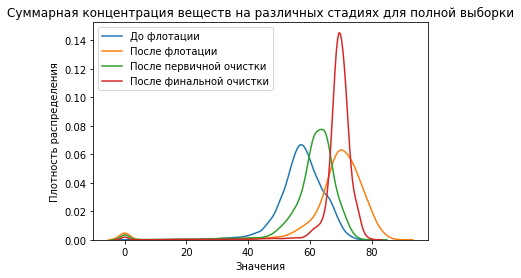

In [27]:
sns.kdeplot(full['sum_concentrate_before_rougher'], 
         label='До флотации')
sns.kdeplot(full['sum_concentrate_rougher'], 
         label='После флотации')
sns.kdeplot(full['sum_primary_cleaner_output_concentrate'],  
         label='После первичной очистки')
sns.kdeplot(full['sum_final_output_concentrate'],
           label='После финальной очистки')
plt.xlabel('Значения')
plt.ylabel('Плотность распределения')
plt.title('Суммарная концентрация веществ на различных стадиях для полной выборки')
plt.legend();

Удалим выбросы

In [28]:
full=full[full['sum_final_output_concentrate']>40]
full=full[full['sum_primary_cleaner_output_concentrate']>40]
full=full[full['sum_concentrate_rougher']>40]
full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum_concentrate_before_rougher,sum_concentrate_rougher,sum_primary_cleaner_output_concentrate,sum_final_output_concentrate
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,72.640924,63.644396
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,72.543485,63.957723
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,72.095042,64.311180
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,59.957723,63.573449
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,71.321010,64.004667


### Для обучающей выборки

In [29]:
#Перед флотацией
train['sum_concentrate_before_rougher']=train['rougher.input.feed_ag']+train['rougher.input.feed_pb']+train['rougher.input.feed_sol']+train['rougher.input.feed_au']

#После флотации
train['sum_concentrate_rougher']=train['rougher.output.concentrate_ag']+train['rougher.output.concentrate_pb']+train['rougher.output.concentrate_sol']+train['rougher.output.concentrate_au']

#После первичной очистки
train['sum_primary_cleaner_output_concentrate']=train['primary_cleaner.output.concentrate_ag']+train['primary_cleaner.output.concentrate_pb']+train['primary_cleaner.output.concentrate_sol']+train['primary_cleaner.output.concentrate_au']

#После финальной очистки
train['sum_final_output_concentrate']=train['final.output.concentrate_ag']+train['final.output.concentrate_pb']+train['final.output.concentrate_sol']+train['final.output.concentrate_au']

sum_concentrate_train=['sum_concentrate_rougher','sum_primary_cleaner_output_concentrate','sum_final_output_concentrate']

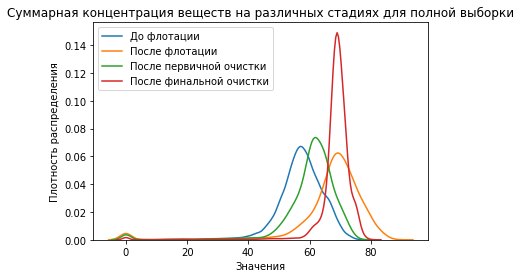

In [30]:
sns.kdeplot(full['sum_concentrate_before_rougher'], 
         label='До флотации')
sns.kdeplot(train['sum_concentrate_rougher'], 
         label='После флотации')
sns.kdeplot(train['sum_primary_cleaner_output_concentrate'],  
         label='После первичной очистки')
sns.kdeplot(train['sum_final_output_concentrate'],
           label='После финальной очистки')
plt.xlabel('Значения')
plt.ylabel('Плотность распределения')
plt.title('Суммарная концентрация веществ на различных стадиях для полной выборки')
plt.legend();

Удалим выбросы

In [31]:
train=train[train['sum_final_output_concentrate']>40]
train=train[train['sum_primary_cleaner_output_concentrate']>40]
train=train[train['sum_concentrate_rougher']>40]
train=train.reset_index()
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum_concentrate_before_rougher,sum_concentrate_rougher,sum_primary_cleaner_output_concentrate,sum_final_output_concentrate
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,72.640924,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,72.543485,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,72.095042,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,59.957723,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,71.321010,64.004667


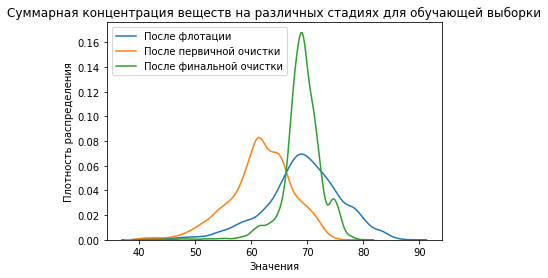

In [32]:
sns.kdeplot(train['sum_concentrate_rougher'], 
         label='После флотации')
sns.kdeplot(train['sum_primary_cleaner_output_concentrate'],  
         label='После первичной очистки')
sns.kdeplot(train['sum_final_output_concentrate'],
           label='После финальной очистки')
plt.xlabel('Значения')
plt.ylabel('Плотность распределения')
plt.title('Суммарная концентрация веществ на различных стадиях для обучающей выборки')
plt.legend();

### Промежуточный вывод

- концентрация свинца и золота растет с каждым новым процессом очистки, тогда как концентрация серебра - падает
- распределение размера гранул в тестовой и обучающей выборках схожи - модель будет работать корректно
- исследована суммарная концентрация веществ на разных стадиях техпроцесса. Присутствовал пик на нулевом значении - это выброс, мы его удалили. По мере очистки суммарная концентрентрация веществ растет постопенно, после финальной очистки - взлетает.

# Модель

## Итоговая sMAPE

In [33]:
def sMAPE(y_true,y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return error

In [34]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

# Обучение моделей

In [35]:
columns=test.columns

features_train = train[columns]
target_train_rougher = np.array(train['rougher.output.recovery'])
target_train_final = np.array(train['final.output.recovery'])

for sample in [features_train, target_train_rougher, target_train_final]:
    print(sample.shape)

(13132, 52)
(13132,)
(13132,)


In [36]:
score = make_scorer(sMAPE, greater_is_better = False)

In [37]:
model_rfr = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=12345))

model_dtr = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=12345))

model_lr = make_pipeline(StandardScaler(), LinearRegression())

In [38]:
parameters_rfr = {'randomforestregressor__n_estimators': range(1,100),
                  'randomforestregressor__max_depth': range(1,10)}

parameters_dtr = {'decisiontreeregressor__max_depth': range(1,10)}

parameters_lr = {}

In [39]:
grid_rougher_rfr = GridSearchCV(model_rfr, param_grid=parameters_rfr, cv=3, scoring=score, n_jobs=-1, verbose=10)
grid_final_rfr = GridSearchCV(model_rfr, param_grid=parameters_rfr, cv=3, scoring=score, n_jobs=-1, verbose=10)

grid_rougher_dtr = GridSearchCV(model_dtr, param_grid=parameters_dtr, cv=3, scoring=score, n_jobs=-1, verbose=10)
grid_final_dtr = GridSearchCV(model_dtr, param_grid=parameters_dtr, cv=3, scoring=score, n_jobs=-1, verbose=10)

grid_rougher_lr = GridSearchCV(model_lr, param_grid=parameters_lr, scoring=score)
grid_final_lr = GridSearchCV(model_lr, param_grid=parameters_lr, scoring=score)

In [40]:
grid_rougher_rfr.fit(features_train, target_train_rougher)
grid_final_rfr.fit(features_train, target_train_final)

grid_rougher_dtr.fit(features_train, target_train_rougher)
grid_final_dtr.fit(features_train, target_train_final)

grid_rougher_lr.fit(features_train, target_train_rougher)
grid_final_lr.fit(features_train, target_train_final)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START randomforestregressor__max_depth=1, randomforestregressor__n_estimators=1
[CV 1/3; 1/4] END randomforestregressor__max_depth=1, randomforestregressor__n_estimators=1; total time=   0.1s
[CV 2/3; 1/4] START randomforestregressor__max_depth=1, randomforestregressor__n_estimators=1
[CV 2/3; 1/4] END randomforestregressor__max_depth=1, randomforestregressor__n_estimators=1; total time=   0.1s
[CV 3/3; 1/4] START randomforestregressor__max_depth=1, randomforestregressor__n_estimators=1
[CV 3/3; 1/4] END randomforestregressor__max_depth=1, randomforestregressor__n_estimators=1; total time=   0.0s
[CV 1/3; 2/4] START randomforestregressor__max_depth=1, randomforestregressor__n_estimators=100
[CV 1/3; 2/4] END randomforestregressor__max_depth=1, randomforestregressor__n_estimators=100; total time=   3.0s
[CV 2/3; 2/4] START randomforestregressor__max_depth=1, randomforestregressor__n_estimators=100
[CV 2/3; 2/4] EN

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [41]:
best_score_rougher_rfr = grid_rougher_rfr.best_score_
best_score_final_rfr = grid_final_rfr.best_score_

best_score_rougher_dtr = grid_rougher_dtr.best_score_
best_score_final_dtr = grid_final_dtr.best_score_

best_score_rougher_lr = grid_rougher_lr.best_score_
best_score_final_lr = grid_final_lr.best_score_

print('по модели RandomForestRegressor лучший результат rougher =', -best_score_rougher_rfr)
print('по модели DecisionTreeRegressor лучший результат rougher =', -best_score_rougher_dtr)
print('по модели LinearRegression лучший результат rougher =', -best_score_rougher_lr)
print()
print('по модели RandomForestRegressor лучший результат final =', -best_score_final_rfr)
print('по модели DecisionTreeRegressor лучший результат final =', -best_score_final_dtr)
print('по модели LinearRegression лучший результат final =', -best_score_final_lr)

по модели RandomForestRegressor лучший результат rougher = 8.053089387564908
по модели DecisionTreeRegressor лучший результат rougher = 9.03916868769205
по модели LinearRegression лучший результат rougher = 7.165478091961885

по модели RandomForestRegressor лучший результат final = 9.488227582174433
по модели DecisionTreeRegressor лучший результат final = 9.824048802775621
по модели LinearRegression лучший результат final = 10.998419304563757


In [42]:
#final sMAPE для каждой модели:
final_smape_rfr = final_sMAPE(best_score_rougher_rfr, best_score_final_rfr)
print('по модели RandomForestRegressor итоговое sMAPE =', -final_smape_rfr)

final_smape_dtr = final_sMAPE(best_score_rougher_dtr, best_score_final_dtr)
print('по модели DecisionTreeRegressor итоговое sMAPE =', -final_smape_dtr)

final_smape_lr = final_sMAPE(best_score_rougher_lr, best_score_final_lr)
print('по модели LinearRegression итоговое sMAPE =', -final_smape_lr)

по модели RandomForestRegressor итоговое sMAPE = 9.129443033522053
по модели DecisionTreeRegressor итоговое sMAPE = 9.627828774004728
по модели LinearRegression итоговое sMAPE = 10.04018400141329


Лучшей оказалась модель Случайного леса (показала меньшую sMAPE по сравнению с другими моделями), поэтому именно она была выбрана для итогового тестирования

In [43]:
target = full[['rougher.output.recovery', 'final.output.recovery']]

In [44]:
target.head()

,rougher.output.recovery,final.output.recovery
date,,
2016-01-15 00:00:00,87.107763,70.541216
2016-01-15 01:00:00,86.843261,69.266198
2016-01-15 02:00:00,86.842308,68.116445
2016-01-15 03:00:00,87.226430,68.347543
2016-01-15 04:00:00,86.688794,66.927016


In [45]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18108 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  18108 non-null  float64
 1   final.output.recovery    18108 non-null  float64
dtypes: float64(2)
memory usage: 424.4+ KB


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [47]:
target = target['2016-09-01 00:59:59' : '2017-12-31 23:59:59']
target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9671 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  9671 non-null   float64
 1   final.output.recovery    9671 non-null   float64
dtypes: float64(2)
memory usage: 226.7+ KB


In [48]:
target=target[['rougher.output.recovery','final.output.recovery']]
#target.info()
test = test.merge(target, on='date',how='left')
test.isna().sum().sum()

628

In [49]:
test=test.dropna()

In [50]:
test.isna().sum().sum()

0

In [51]:
#оценка лучшей модели на тестовой выборке:
features_test = np.array(test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1))
target_test_rouger = np.array(test['rougher.output.recovery'])
target_test_final = np.array(test['final.output.recovery'])
test_rogher = grid_rougher_rfr.predict(features_test) 
test_final = grid_final_rfr.predict(features_test)

rouger_smape_test = sMAPE(target_test_rouger, test_rogher)
final_smape_test = sMAPE(target_test_final, test_final)

final_smape = final_sMAPE(rouger_smape_test, final_smape_test)
print('Симметричная средняя абсолютная процентная ошибка на тестовой выборке =', round(final_smape,3))

Симметричная средняя абсолютная процентная ошибка на тестовой выборке = 6.769


## Проверка модели

In [52]:
for strategy in ['mean', 'median']:
    dummy_rougher = DummyRegressor(strategy=strategy)
    dummy_final = DummyRegressor(strategy=strategy)
    
    dummy_rougher.fit(features_train, target_train_rougher)
    dummy_final.fit(features_train, target_train_final)
    
    rougher = dummy_rougher.predict(test)
    final = dummy_final.predict(test)
    
    final_smape = final_sMAPE(sMAPE(target_test_rouger, rougher),
                                   sMAPE(target_test_final, final))

    print('Для стратегии', strategy, 'итоговая sMAPE =', round(final_smape,3))

Для стратегии mean итоговая sMAPE = 7.516
Для стратегии median итоговая sMAPE = 7.142


По сравнению с константной моделью значения метрик, показанные RandomForestRegressor, оказались выше. Поэтому будем считать, что RandomForestRegressor прошла проверку на вменяемость

# Вывод
Лучше всего показала себя модель Случайный лес, ее рекомендовано использовать